In [14]:
import numpy as np

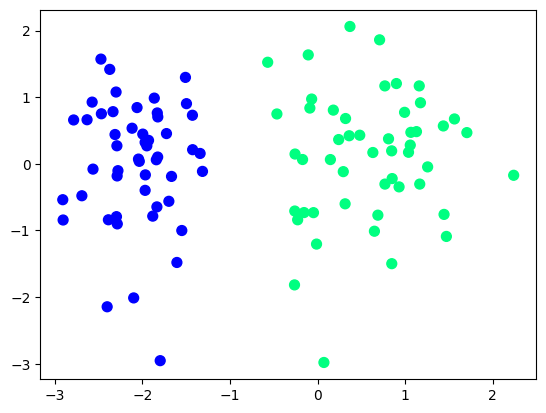

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_classes=2, n_features=2, n_clusters_per_class=1, class_sep=13,
                              n_informative=1, n_redundant=0, hypercube=False, random_state=41)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=50)

In [156]:
class Layer:
    def __init__(self, input_size, output_size, activation='relu', lr=0.01):
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.zeros(output_size)
        self.lr = lr
        self.activation = activation
        self.inputs = None
        self.output = None
    
    def __call__(self, x):
        return self.forward(x)
        
    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, x):
        return np.where(x>0, 1, 0)
    
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    
    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
        
    def forward(self, inputs):
        self.inputs = inputs
        
        # z: [batch_size, output_size]
        z = np.dot(inputs, self.weights.T) + self.bias
        
        if self.activation == 'relu':
            self.output = self.relu(z)
        
        elif self.activation == 'sigmoid':
            self.output = self.sigmoid(z)
        
        else:
            self.output = z

        return self.output

    def backward(self, output_gradient):
        # output_gradient: [batch_size, gradient_size]
        
        if self.activation=='relu':
            # [batch_size, output_size]
            activation_gradient = self.relu_derivative(self.output)
        elif self.activation=='sigmoid':
            activation_gradient = self.sigmoid_derivative(self.output)
        else:
            activation_gradient = 1
        
        # [batch_size, input_size]
        z_gradient_w = self.inputs
        z_gradient_b = 1
        
        # [batch_size, output_size]
        loss_gradient_z = output_gradient * activation_gradient
        # [output_size, input_size]
        loss_gradient_w = np.dot(loss_gradient_z.T, z_gradient_w)
        
        loss_gradient_b = np.sum(loss_gradient_z, axis=0) * z_gradient_b
        
        
        self.weights -= self.lr * loss_gradient_w
        self.bias = self.bias - (self.lr * loss_gradient_b)
        
        # [output_size, input_size]
        z_gradient_inputs = self.weights
        
        # [batch_size, input_size]
        input_gradients = np.dot(loss_gradient_z, z_gradient_inputs)
        
        return input_gradients 

In [157]:
a = np.random.rand(3, 1)
b = np.random.rand(1,)
b-a, b.shape, a.shape

(array([[0.23683783],
        [0.12934747],
        [0.28010304]]),
 (1,),
 (3, 1))

In [158]:
class NeuralNetwork:
    def __init__(self):
        self.layers = []

    def add(self, layer):
        self.layers.append(layer)
    
    def forward(self, input):
        for layer in self.layers:
            input = layer(input)
        
        return input
    
    def backward(self, loss_gradient):
        for i, layer in enumerate(reversed(self.layers)):
            # print(i)
            loss_gradient = layer.backward(loss_gradient)

    def train(self, X, y, epochs, batch_size, verbose=10):
        losses = []
        for epoch in range(epochs):
            total_loss = 0
            for i in range(0, len(X), batch_size):
                batch_X = X[i:i+batch_size]
                batch_y = y[i:i+batch_size]
                
                batch_y = batch_y.reshape(-1, 1)

                # forward pass
                predictions = self.forward(batch_X)

                # compute_loss
                loss = np.mean((predictions - batch_y)** 2)
                total_loss += loss
                
                # backward pass
                loss_gradient = 2 * (predictions - batch_y) / batch_size
                self.backward(loss_gradient)
            
            avg_loss = total_loss/len(X)
            losses.append(avg_loss)
            
            if (epoch + 1) % verbose == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")
        
        return losses

In [159]:
X.shape, y.shape

((100, 2), (100,))

In [160]:
np.random.seed(42)

nn = NeuralNetwork()
nn.add(Layer(input_size=2, output_size=10, activation='relu'))
nn.add(Layer(10, 1, activation='sigmoid'))

In [161]:
losses = nn.train(X=X, y=y, epochs=100, batch_size=1)

Epoch 10/100, Loss: 0.0134
Epoch 20/100, Loss: 0.0037
Epoch 30/100, Loss: 0.0019
Epoch 40/100, Loss: 0.0011
Epoch 50/100, Loss: 0.0008
Epoch 60/100, Loss: 0.0006
Epoch 70/100, Loss: 0.0005
Epoch 80/100, Loss: 0.0004
Epoch 90/100, Loss: 0.0003
Epoch 100/100, Loss: 0.0002


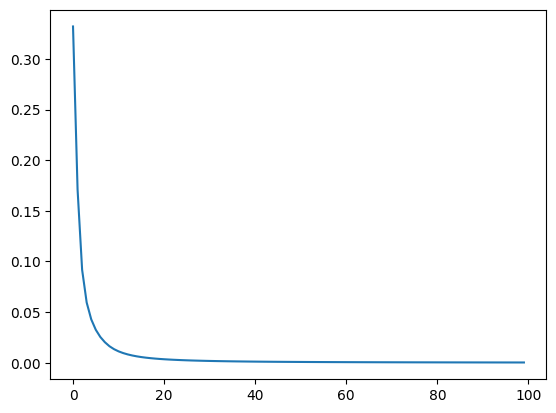

In [162]:
plt.plot(losses)

## XOR DATASET

In [163]:
import numpy as np

# XOR inputs and outputs
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 1, 1, 0])  # Expected outputs

In [166]:
nn = NeuralNetwork()

nn.add(Layer(2, 2, activation='relu'))  # Hidden layer
nn.add(Layer(2, 1, activation='sigmoid'))  # Output layer

losses = nn.train(X, y, epochs=3000, batch_size=1, verbose=300)

Epoch 300/3000, Loss: 0.2055
Epoch 600/3000, Loss: 0.1523
Epoch 900/3000, Loss: 0.0860
Epoch 1200/3000, Loss: 0.0445
Epoch 1500/3000, Loss: 0.0241
Epoch 1800/3000, Loss: 0.0143
Epoch 2100/3000, Loss: 0.0091
Epoch 2400/3000, Loss: 0.0062
Epoch 2700/3000, Loss: 0.0044
Epoch 3000/3000, Loss: 0.0033


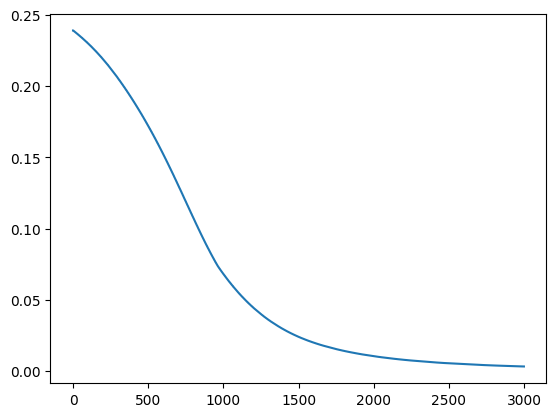

In [167]:
plt.plot(losses)